📊 SIM Swap Fraud Detection — Raw Input Features
🧠 Step 1: Define the Problem and Raw Input Features

SIM swap fraud occurs when attackers fraudulently gain control of a user's mobile number by swapping the SIM card. This allows them to intercept OTPs (One-Time Passwords) and bypass multi-factor authentication, often leading to account takeovers.

To detect such behavior, we will build an anomaly detection model using features that reflect:

👤 Identity changes

🌐 Network and device shifts

📍 Geolocation mismatches

⏱️ Time-based behavioral gaps

📥 Raw Input Features and Contextual Signals

These are the features we collect per transaction (row-level input). Some of them are directly observed, and others are derived from behavioral history.

🔧 Identity and Device Flags

sim_swap_time_gap_minutes:
⏱️ Time in minutes between the last SIM swap and OTP request.

device_change_flag:
📱 Indicates whether the device used has recently changed.

sim_type_change_flag:
🔄 Indicates if the SIM type changed (e.g., eSIM to physical SIM).

imsi_change_flag:
🧬 Indicates if the IMSI (mobile subscriber identity) changed.

iccid_change_flag:
🧾 Indicates if the ICCID (SIM serial number) changed.

🌍 Geolocation Feature

otp_and_sim_change_geo_hash_length:
📍 A similarity score (0 to 1) representing how close the location of the SIM change is to the OTP request location.

📊 Behavioral and Historical Features (🆕)

recent_sim_activation_days 🆕:
📆 Days since the current SIM was activated.

num_sim_changes_last_30d 🆕:
🔁 Number of SIM changes in the past 30 days.

previous_sim_holder_tenure_days 🆕:
📅 Number of days the previous SIM was held before it was swapped.

account_age_days 🆕:
📈 Total age (in days) of the mobile account.

ip_change_flag 🆕:
🌐 Indicates whether the IP address has recently changed.

We will use these fields as inputs to generate synthetic data, enrich them into derived signals, and train a machine learning model to detect SIM swap anomalies.

📈 Step 3: Enrich the Dataset with Derived Features

To improve fraud detection signals, we derive additional features from the raw input fields. These features compress behavioral signals and help the model better differentiate between normal and anomalous activity.

🔧 Engineered Features Description
Feature Name	Description
time_urgency_score	How urgent the OTP was after SIM swap (normalized).
identity_shift_score	Sum of binary identity changes (device, SIM, IMSI, ICCID).
geo_risk_score	Inverse of geolocation similarity (1 - geo hash score).
tenure_risk_score 🆕	Ratio of previous SIM tenure to account age.
recency_risk_score 🆕	Inverse of recent SIM activation (more recent → higher risk).
frequency_score 🆕	Number of SIM swaps in last 30 days, capped.
ip_change_risk 🆕	Same as ip_change_flag (binary risk from network behavior).

📦 Dataset shape: (10000, 12)

🧱 Feature data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sim_swap_time_gap_minutes           10000 non-null  int64  
 1   device_change_flag                  10000 non-null  int64  
 2   sim_type_change_flag                10000 non-null  int64  
 3   imsi_change_flag                    10000 non-null  int64  
 4   iccid_change_flag                   10000 non-null  int64  
 5   otp_and_sim_change_geo_hash_length  10000 non-null  float64
 6   recent_sim_activation_days          10000 non-null  int64  
 7   num_sim_changes_last_30d            10000 non-null  int64  
 8   previous_sim_holder_tenure_days     10000 non-null  int64  
 9   account_age_days                    10000 non-null  int64  
 10  ip_change_flag                      10000 non

/tmp/ipython-input-2029077850.py:33: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


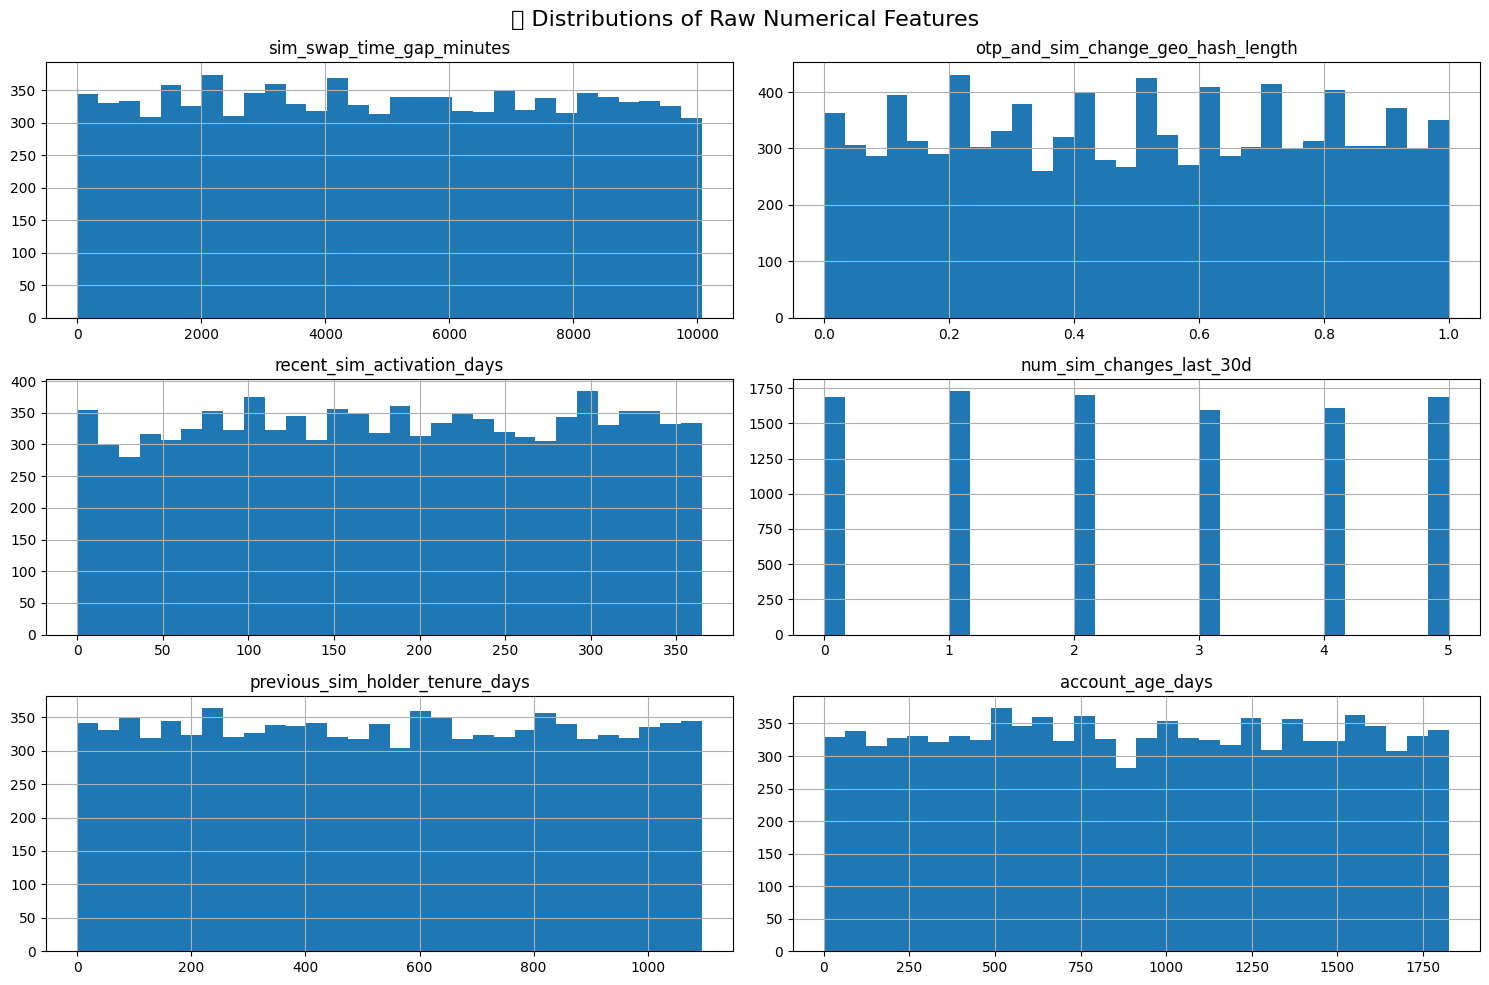

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


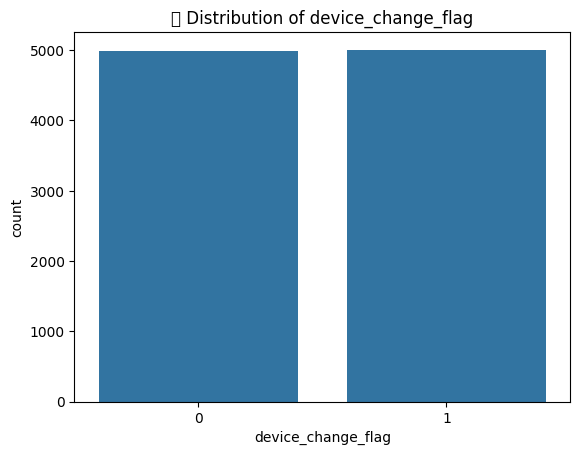

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


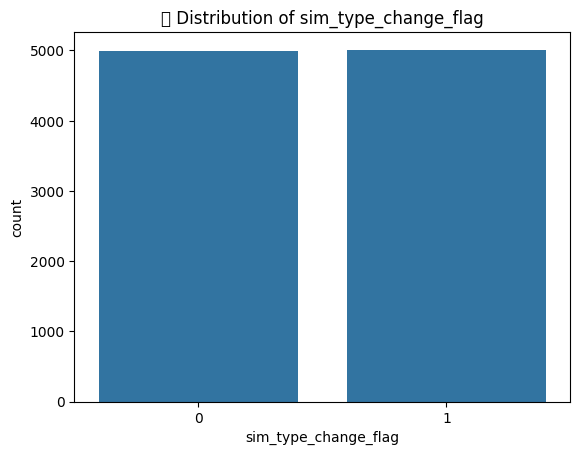

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


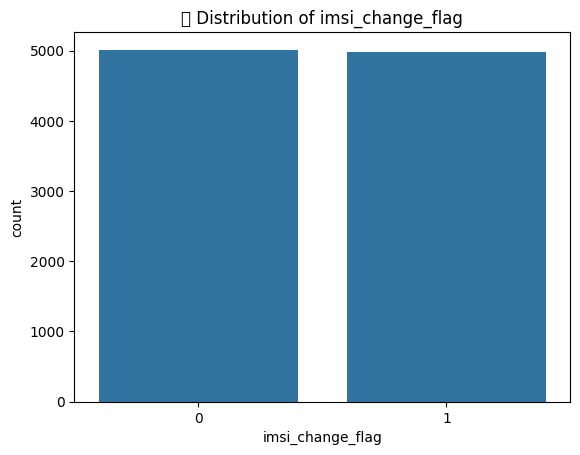

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


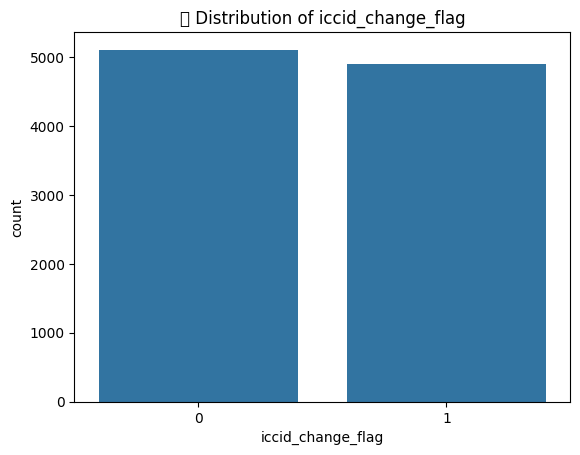

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


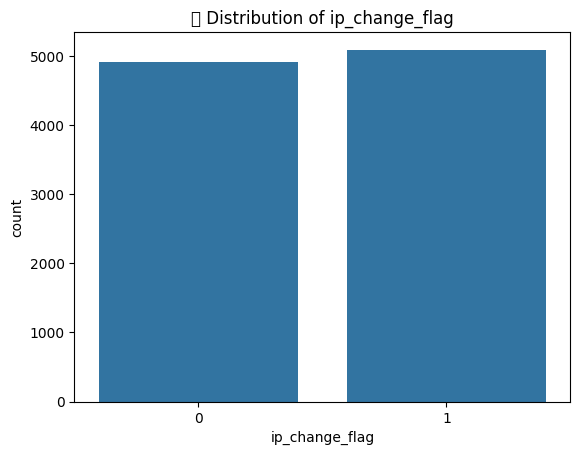

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw dataset
df_raw = pd.read_csv("sim_swap_fraud_dataset_10000.csv")

# Basic info
print("📦 Dataset shape:", df_raw.shape)
print("\n🧱 Feature data types and nulls:")
print(df_raw.info())

# Check for missing values
print("\n❗ Missing values:")
print(df_raw.isnull().sum())

# Class balance of the target variable
print("\n⚖️ SIM Swap Flag Distribution:")
print(df_raw['sim_swap_flag'].value_counts(normalize=True))

# Plot distributions of numerical features
numerical_features = [
    'sim_swap_time_gap_minutes',
    'otp_and_sim_change_geo_hash_length',
    'recent_sim_activation_days',
    'num_sim_changes_last_30d',
    'previous_sim_holder_tenure_days',
    'account_age_days'
]

df_raw[numerical_features].hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.suptitle("🧮 Distributions of Raw Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Plot categorical flags
categorical_flags = [
    'device_change_flag',
    'sim_type_change_flag',
    'imsi_change_flag',
    'iccid_change_flag',
    'ip_change_flag'
]

for col in categorical_flags:
    sns.countplot(data=df_raw, x=col)
    plt.title(f"🔢 Distribution of {col}")
    plt.show()


🔧 Enrichment Logic

We’ll derive the following new features:

Feature	Logic
time_urgency_score	Inverse normalized SIM-OTP time gap: More urgent = closer to 0
identity_shift_score	Sum of identity-related change flags (device, SIM type, IMSI, ICCID)
geo_risk_score	Inverse of geolocation match score (higher = riskier)
recent_account_score 🆕	Normalized age of account (younger accounts = riskier)
ip_instability_score 🆕	Equals 1 if IP changed recently, else 0
frequent_swap_score 🆕	Normalized number of SIM changes in last 30 days
short_tenure_risk 🆕	Inverse normalized tenure of previous SIM holder (shorter = riskier)

In [19]:
def enrich_input(raw):
    enriched = raw.copy()

    # 1. Time urgency: Closer the swap time to OTP request, higher the risk
    enriched['time_urgency_score'] = 1 - min(raw['sim_swap_time_gap_minutes'], 10080) / 10080

    # 2. Identity shift: Total number of identity-related changes
    enriched['identity_shift_score'] = sum([
        raw['device_change_flag'],
        raw['sim_type_change_flag'],
        raw['imsi_change_flag'],
        raw['iccid_change_flag']
    ])

    # 3. Geo risk: High risk if geohash similarity is low
    enriched['geo_risk_score'] = 1 - raw['otp_and_sim_change_geo_hash_length']

    # 4. SIM activity score: Combines recent activation and change frequency
    enriched['sim_activity_score'] = (
        (1 - min(raw['recent_sim_activation_days'], 365) / 365) * 0.5 +
        min(raw['num_sim_changes_last_30d'], 10) / 10 * 0.5
    )

    # 5. Account risk score: Younger accounts and recent IP changes are riskier
    enriched['account_risk_score'] = (
        (1 - min(raw['account_age_days'], 1825) / 1825) * 0.7 +
        raw['ip_change_flag'] * 0.3
    )

    return enriched



In [22]:
# Apply enrichment row-wise to the raw dataset
# Load the previously generated dataset
df_raw = pd.read_csv("sim_swap_fraud_dataset_10000.csv")

# Apply the enrichment function to generate derived features
df_enriched = df_raw.apply(enrich_input, axis=1)

# Preview the enriched dataset
df_enriched.head()


,sim_swap_time_gap_minutes,device_change_flag,sim_type_change_flag,imsi_change_flag,iccid_change_flag,otp_and_sim_change_geo_hash_length,recent_sim_activation_days,num_sim_changes_last_30d,previous_sim_holder_tenure_days,account_age_days,ip_change_flag,sim_swap_flag,time_urgency_score,identity_shift_score,geo_risk_score,sim_activity_score,account_risk_score
0,245.0,1.0,1.0,0.0,1.0,0.81,352.0,5.0,759.0,1525.0,1.0,1.0,0.975694,3.0,0.19,0.267808,0.415068
1,7268.0,1.0,1.0,1.0,1.0,0.15,335.0,1.0,534.0,541.0,1.0,1.0,0.278968,4.0,0.85,0.091096,0.792493
2,7985.0,0.0,0.0,0.0,0.0,0.52,198.0,3.0,167.0,143.0,0.0,0.0,0.207837,0.0,0.48,0.378767,0.645151
3,4048.0,1.0,1.0,0.0,1.0,0.83,311.0,2.0,685.0,1255.0,0.0,1.0,0.598413,3.0,0.17,0.173973,0.218630
4,2141.0,0.0,0.0,0.0,0.0,0.24,176.0,2.0,284.0,540.0,0.0,0.0,0.787599,0.0,0.76,0.358904,0.492877


# Explore Feature Distribution

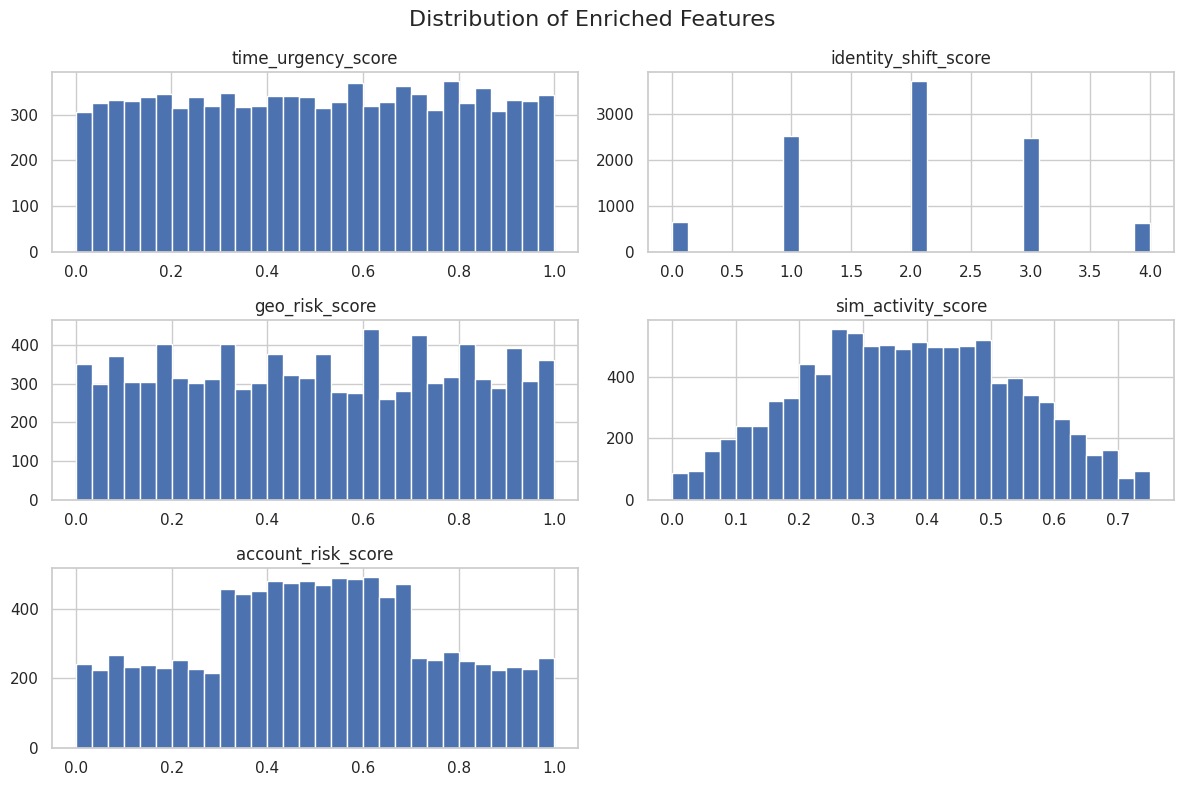

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot histograms for enriched features
enriched_features = [
    'time_urgency_score',
    'identity_shift_score',
    'geo_risk_score',
    'sim_activity_score',
    'account_risk_score'
]

df_enriched[enriched_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Enriched Features", fontsize=16)
plt.tight_layout()
plt.show()

🧪 Step 4: Feature Selection and Train-Test Split

Before we train the model, we need to:

Select the right input features (the ones used during model training).

Split the dataset into training and testing sets to evaluate performance fairly.

🎯 Feature Selection

We'll select only the derived (enriched) features as model inputs. These are designed to expose fraud patterns more explicitly than raw flags.

In [27]:
from sklearn.ensemble import IsolationForest

# Define feature columns to train the model on (only derived features)
feature_columns = [
    'time_urgency_score',
    'identity_shift_score',
    'geo_risk_score',
    'sim_activity_score',
    'account_risk_score'
]

# Extract feature matrix
X = df_enriched[feature_columns]

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)


IsolationForest(contamination=0.05, random_state=42)

In [28]:
# Compute anomaly scores (-1 is anomaly, 1 is normal)
anomaly_flags = iso_forest.predict(X)
anomaly_scores_raw = iso_forest.decision_function(X)

# Convert raw scores to 0-100% risk (higher = more likely anomaly)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
anomaly_scores_percent = 100 - scaler.fit_transform(anomaly_scores_raw.reshape(-1, 1)).flatten()

# Append results to dataset
df_enriched['anomaly_flag'] = anomaly_flags
df_enriched['anomaly_risk_percent'] = anomaly_scores_percent

# Show sample with scores
df_enriched[['anomaly_flag', 'anomaly_risk_percent'] + feature_columns].head(10)


,anomaly_flag,anomaly_risk_percent,time_urgency_score,identity_shift_score,geo_risk_score,sim_activity_score,account_risk_score
0,1,32.627322,0.975694,3.0,0.19,0.267808,0.415068
1,-1,71.654334,0.278968,4.0,0.85,0.091096,0.792493
2,1,47.429839,0.207837,0.0,0.48,0.378767,0.645151
3,1,36.833451,0.598413,3.0,0.17,0.173973,0.218630
4,1,43.691326,0.787599,0.0,0.76,0.358904,0.492877
5,1,36.862596,0.077083,2.0,0.48,0.212329,0.216329
6,1,5.075358,0.327480,2.0,0.52,0.362329,0.647452
7,1,39.407014,0.192659,1.0,0.97,0.260274,0.616822
8,1,33.779440,0.490774,1.0,0.88,0.509589,0.237808
9,1,31.652773,0.680754,3.0,0.51,0.604795,0.491342


🔜 Step 8: Thresholding and Alert Classification

Now that you have a continuous anomaly score, the next step is to classify alerts (e.g., low, medium, high risk) using thresholds.

Example categories:
Anomaly Risk Score (%)	Alert Level
0–40%	✅ Normal
40–70%	⚠️ Medium Risk
70–100%	🚨 High Risk

You’ll:

Add an alert_level column to your dataset

Analyze the count of each risk category

Optionally visualize their distribution

Would you like me to generate this Step 8 for you now?

Alert Level Distribution:
alert_level
Normal ✅          6090
Medium Risk ⚠️    3581
High Risk 🚨        329
Name: count, dtype: int64


/tmp/ipython-input-3675375580.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_enriched, x='alert_level', order=["Normal ✅", "Medium Risk ⚠️", "High Risk 🚨"], palette="coolwarm")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


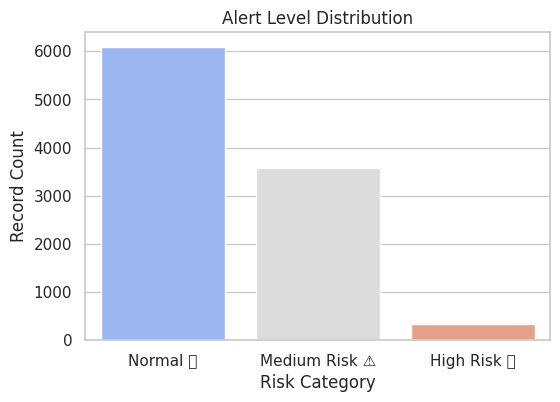

In [29]:
# Step 8: Assign alert level based on anomaly risk percentage

def classify_alert(score_pct):
    if score_pct >= 70:
        return "High Risk 🚨"
    elif score_pct >= 40:
        return "Medium Risk ⚠️"
    else:
        return "Normal ✅"

# Apply classification
df_enriched['alert_level'] = df_enriched['anomaly_risk_percent'].apply(classify_alert)

# Show distribution of alert levels
alert_counts = df_enriched['alert_level'].value_counts()
print("Alert Level Distribution:")
print(alert_counts)

# Optional: visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_enriched, x='alert_level', order=["Normal ✅", "Medium Risk ⚠️", "High Risk 🚨"], palette="coolwarm")
plt.title("Alert Level Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Record Count")
plt.show()


In [30]:
import joblib

# Step 9.1: Save the trained Isolation Forest model
joblib.dump(iso_forest, "sim_swap_iso_forest_model.pkl")
print("✅ Model saved as sim_swap_iso_forest_model.pkl")

# Step 9.2: Save enriched data with anomaly scores and alerts
df_enriched.to_csv("sim_swap_enriched_anomaly_output.csv", index=False)
print("📁 Enriched dataset saved as sim_swap_enriched_anomaly_output.csv")


✅ Model saved as sim_swap_iso_forest_model.pkl
📁 Enriched dataset saved as sim_swap_enriched_anomaly_output.csv


We'll use common Python visualization libraries like matplotlib and seaborn to understand how the model is behaving and what kinds of patterns are triggering anomaly alerts.

🔍 Key Questions We’ll Try to Answer:

What’s the overall distribution of risk scores?

How many records fall into each risk category?

What features are most common in high-risk alerts?

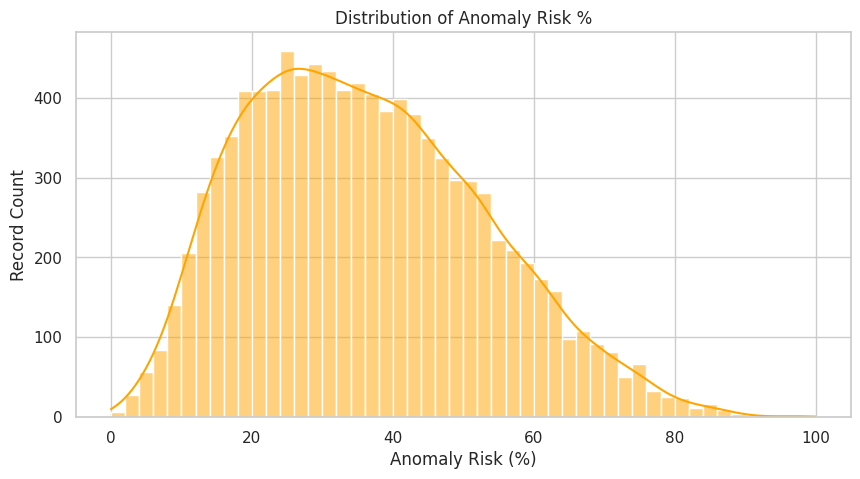

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# 1. Histogram of anomaly risk percentage
plt.figure(figsize=(10, 5))
sns.histplot(df_enriched['anomaly_risk_percent'], bins=50, kde=True, color='orange')
plt.title("Distribution of Anomaly Risk %")
plt.xlabel("Anomaly Risk (%)")
plt.ylabel("Record Count")
plt.show()


TEST Model

In [39]:
score_range = iso_forest.decision_function(X)
score_min = score_range.min()
score_max = score_range.max()

In [56]:
# Rescale score between 0 and 1
normalized_score = (score - score_min) / (score_max - score_min)

# Convert to anomaly risk (higher = more suspicious)
anomaly_risk_percent = int((1 - normalized_score) * 100)

In [74]:
# Step 0: Define raw input
raw_input = {
    "sim_swap_time_gap_minutes": 60000,
    "device_change_flag": 1,
    "sim_type_change_flag": 0,
    "imsi_change_flag": 0,
    "iccid_change_flag": 0,
    "otp_and_sim_change_geo_hash_length": 0,
    "recent_sim_activation_days": 10,
    "num_sim_changes_last_30d": 0,
    "previous_sim_holder_tenure_days": 100,
    "account_age_days": 100,
    "ip_change_flag": 0
}

# Step 1: Enrich and prepare
enriched_input = enrich_input(raw_input)
test_df = pd.DataFrame([enriched_input])[feature_columns]

# Step 2: Predict
score = iso_forest.decision_function(test_df)[0]
flag = iso_forest.predict(test_df)[0]

# ✅ Step 3: Normalize score and calculate risk percentage
normalized_score = (score - score_min) / (score_max - score_min)
anomaly_risk_percent = int((1 - normalized_score) * 100)

# Step 4: Output
print(f"Anomaly Score: {score:.4f}")
print(f"Anomaly Flag: {flag} (1 = normal, -1 = anomaly)")
print(f"Estimated SIM Swap Risk: {anomaly_risk_percent}%")


Anomaly Score: 0.0132
Anomaly Flag: 1 (1 = normal, -1 = anomaly)
Estimated SIM Swap Risk: 61%
